In [26]:
import pandas as pd, numpy as np, os
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_columns', None)
from matplotlib.ticker import FuncFormatter

PAL = ['#336b87', '#b4b4b4','#dd4124','#009473','#F1C40F','#DFFF00','#40E0D0','#6495ED','#FF0000','#00FF00','#0000FF','#FF00FF','#800080'] # blue,grey,orange,green,yellow

%matplotlib inline

In [27]:
def setup_plot(w=1,h=1,rows=1,cols=1,X_label='',y_label='',dpi=600):
    '''
    w: width of the figsize parameter of matplotlib.pyplot
    h: height of the figsize parameter of matplotlib.pyplot
    rows: numbers of rows in gridspec
    cols: numbers of cols in gridspec
    X_label: Label of the x-axis
    y_label: Label of the y-axis
    dpi: to set dpi for the figure.dpi
    Return axes (only single axes for now, still working on the multiple axes)
    
    design by @ankitkalauni
    '''
    #setting plot theme
    plt.rcParams['figure.dpi'] = dpi

    fig = plt.figure(figsize=(w,h), facecolor='#f6f5f5')
    gs = fig.add_gridspec(rows, cols)
    gs.update(wspace=1.5, hspace=0.05)

    background_color = "#f6f5f5"
    sns.set_palette(PAL)
    
    #making single ax
    ax_dict = {}
    for row in range(rows):
        for col in range(cols):
            ax_dict["ax%s%s" %(row,col)] = fig.add_subplot(gs[row, col])

    locals().update(ax_dict)

    #setting theme for every ax in local()
    for row in range(rows):
        for col in range(cols):
                    
            for s in ["right", "top"]:
                locals()['ax' + str(row) + str(col)].spines[s].set_visible(False)
                
            locals()['ax' + str(row) + str(col)].set_facecolor(background_color)

            locals()['ax' + str(row) + str(col)].set_facecolor(background_color)
            locals()['ax' + str(row) + str(col)].set_xlabel(X_label,fontsize=3, weight='bold')
            locals()['ax' + str(row) + str(col)].set_ylabel(y_label,fontsize=3, weight='bold')

            locals()['ax' + str(row) + str(col)].tick_params(labelsize=3, width=0.5, length=1.5)
            locals()['ax' + str(row) + str(col)].grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
            locals()['ax' + str(row) + str(col)].grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)

    return locals()['ax' + str(row) + str(col)]

#function to map columns with its new name and return it as dataframe
def clean(data,Question,n):
    x = []
    for i in range(1,n):
        x.append(Question+str(i))


    ddict = {}
    for i in x:
        ddict[data[i].value_counts().keys()[0]]=data[i].value_counts()[0]
    re = pd.DataFrame(ddict.items())
    re.iloc[:,-1] = re.iloc[:,-1].astype('int32')
    re.columns = ['Cloud Notebook\'s','values']
    return re

#function to map columns with its new name and return it as dictionary
def clean_dict(data,Question,n):
    x = []
    for i in range(1,n):
        x.append(Question+str(i))


    ddict = {}
    for i in x:
        ddict[data[i].value_counts().keys()[0]]=data[i].value_counts()[0]
    return ddict

def map_col(data,Question,n):
    x = []
    for i in range(1,n):
        x.append(Question+str(i))


    ddict = {}
    for index, i in enumerate(x):
        ddict[str(x[index])] = data[i].value_counts().keys()[0]
    return ddict

#below function copied from @Ruchi Bhatia
def visualize_relation(start_slice, end_slice, new_col_names, old_col, new_col, xlabel, title, p1,p2,W=1,H=1):
    df_sliced = df.iloc[:,start_slice:end_slice].iloc[1:]

    df_sliced = df_sliced.rename(columns=new_col_names).fillna(0).replace('[^\\d]',1, regex=True)
    df_sliced = df_sliced.join(df[old_col])

    df_sliced_stats = pd.DataFrame()
    for col in df_sliced.columns[:-1]:
        df_sliced_stats[col] = df_sliced.groupby(old_col)[col].mean().values

    df_sliced = df_sliced.rename(columns={old_col:new_col})
    df_sliced_stats.index = df_sliced.groupby(new_col)[list(new_col_names.items())[0][1]].mean().index

    cmap = sns.diverging_palette(p1, p2, as_cmap=True)
    display(df_sliced_stats.style.background_gradient(cmap, axis=0).format("{:.0%}"))

    df_sliced_stats[new_col] = df_sliced_stats.index
    for i in range(len(df_sliced_stats.columns[:-1])):
        color = PAL[i]
        col = df_sliced_stats.columns[i]
        if i ==0:
            ax = df_sliced_stats.plot(kind="scatter", x=col,y=new_col, color=color, label=col,ax=setup_plot(w=W,h=H,X_label=xlabel,y_label=''),alpha=.6, s=30)
        else:
            ax = df_sliced_stats.plot(kind="scatter", x=col,y=new_col, color=color, label=col,ax=ax, s=30,alpha=.6)
    ax.xaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
    ax.set_xlabel(xlabel)
    ax.legend(loc='upper right',bbox_to_anchor=(1.55, 1), frameon=False)
    ax.set_title(title,font="Serif")
    plt.show()

In [3]:
df = pd.read_csv("kaggle_survey_2021_responses.csv", low_memory=False)

In [8]:
df.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,NaN,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN


In [9]:
print(df.shape)

Nigeria = df[df.Q3 == "Nigeria"] #focus on Nigeria

print (Nigeria.shape)


(25974, 369)
(702, 369)


In [10]:
str(df.iloc[0,1])

'What is your age (# years)?'

In [15]:
df.iloc[1:,1:3]

,Q1,Q2
1,50-54,Man
2,50-54,Man
3,22-24,Man
4,45-49,Man
5,45-49,Man
...,...,...
25969,30-34,Man
25970,22-24,Man
25971,50-54,Man
25972,45-49,Man


In [12]:
df.iloc[1:,2]

1        Man
2        Man
3        Man
4        Man
5        Man
        ... 
25969    Man
25970    Man
25971    Man
25972    Man
25973    Man
Name: Q2, Length: 25973, dtype: object

In [16]:
_q = str(df.iloc[0,1])
_df = df.iloc[1:,1]
gender = df.iloc[1:,2]
_df = pd.concat([_df,gender],axis=1)

In [17]:
_df['Q1'].str.extract('(^[0-9]{2})', expand=False).astype(int)

1        50
2        50
3        22
4        45
5        45
         ..
25969    30
25970    22
25971    50
25972    45
25973    18
Name: Q1, Length: 25973, dtype: int32

In [18]:
_df['sort'] = _df['Q1'].str.extract('(^[0-9]{2})', expand=False).astype(int)


In [19]:
_df.sort_values('sort',inplace=True, ascending=True)

In [20]:
_df

,Q1,Q2,sort
12987,18-21,Man,18
11487,18-21,Man,18
11485,18-21,Man,18
11478,18-21,Man,18
11473,18-21,Man,18
...,...,...,...
12284,70+,Woman,70
22799,70+,Man,70
14821,70+,Man,70
7004,70+,Man,70


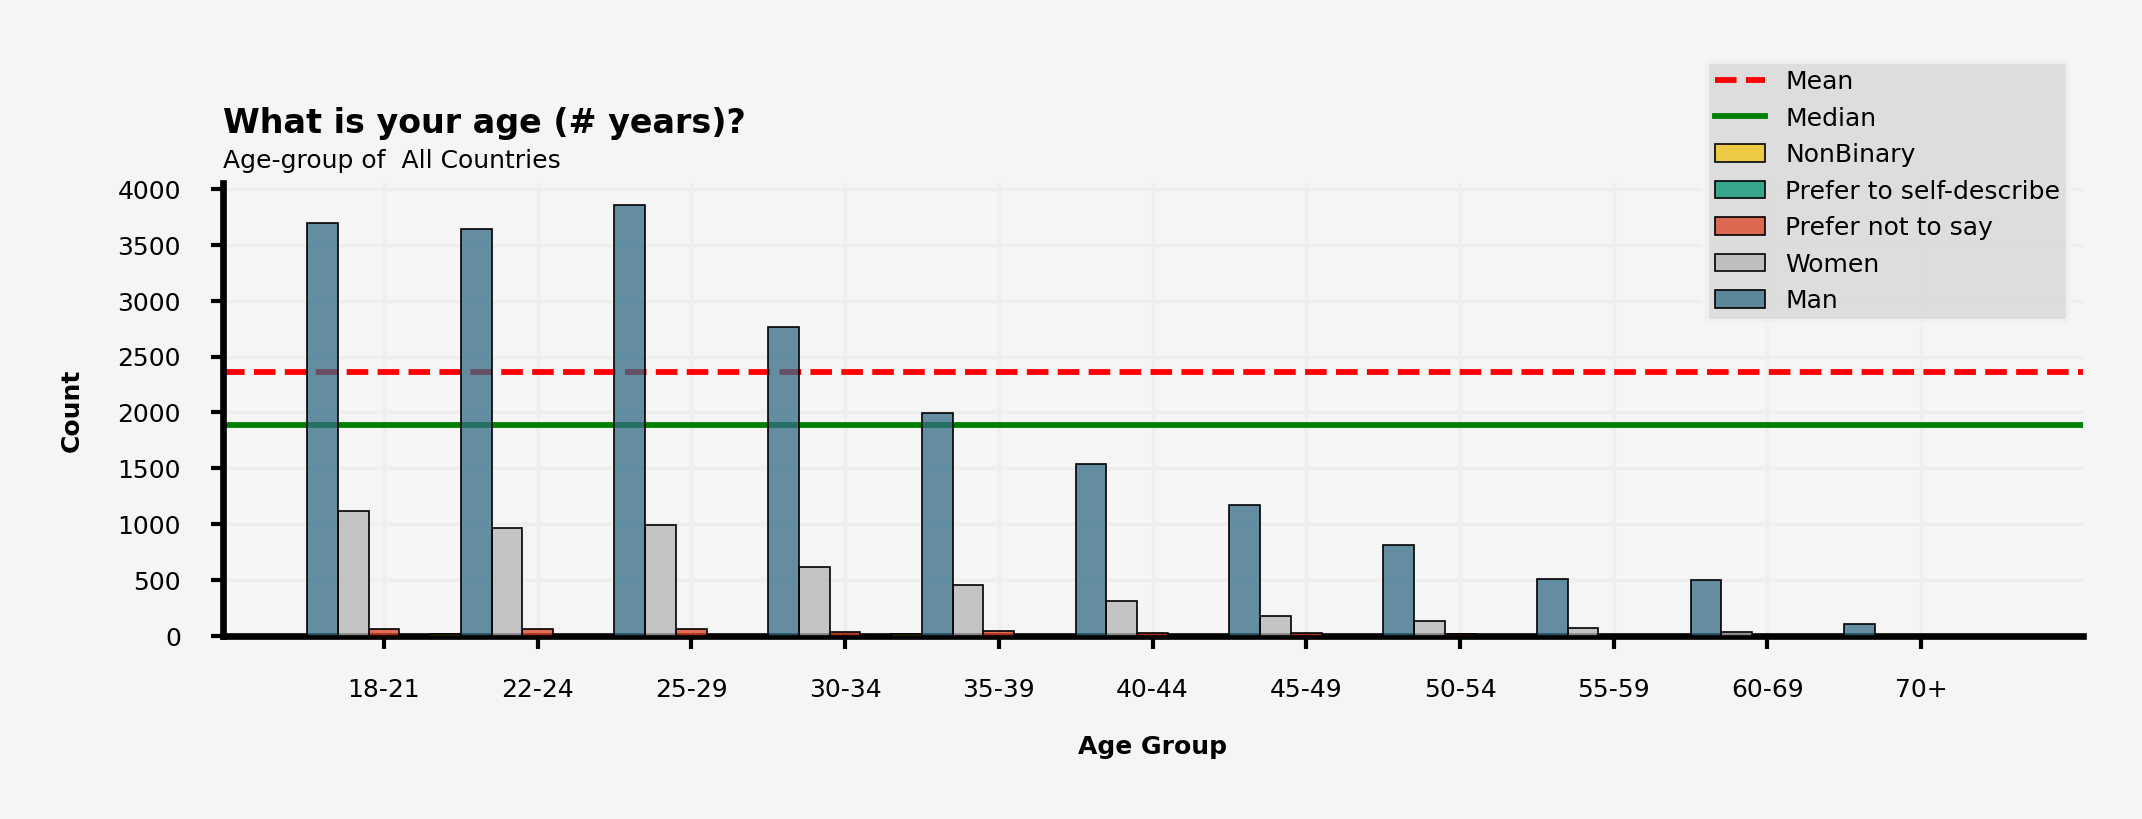

26301

In [28]:
#q1
_q = str(df.iloc[0,1])
_df = df.iloc[1:,1]
gender = df.iloc[1:,2]
_df = pd.concat([_df,gender],axis=1)

_df['sort'] = _df['Q1'].str.extract('(^[0-9]{2})', expand=False).astype(int)
_df.sort_values('sort',inplace=True, ascending=True)
_df = _df.drop('sort', axis=1)

q1 = sns.histplot(x = _df.Q1,ax=setup_plot(w=4,h=1,X_label='Age Group',y_label='Count'),zorder=4,linewidth=0.2,hue=_df.Q2,multiple='dodge')
plt.title(_q,fontsize=4, weight='bold',ha='left',loc='left')

mean=_df['Q1'].value_counts().values.mean()
median=np.median(_df['Q1'].value_counts().values)

q1.axhline(mean, color='r', linestyle='--',linewidth=0.7)
q1.axhline(median, color='g', linestyle='-',linewidth=0.7)

xmin, xmax = q1.get_xlim()
ymin, ymax = q1.get_ylim()

plt.text(xmin,ymax+140,'Age-group of  All Countries',fontsize=3,ha='left')
# plt.xticks(rotation=45)

q1.legend(['Mean','Median','NonBinary','Prefer to self-describe','Prefer not to say','Women','Man'], facecolor='#D8D8D8', edgecolor='#f6f5f5', fontsize=3, bbox_to_anchor=(1, 1.3), loc='upper right')

plt.show()

del gender, _df
gc.collect()

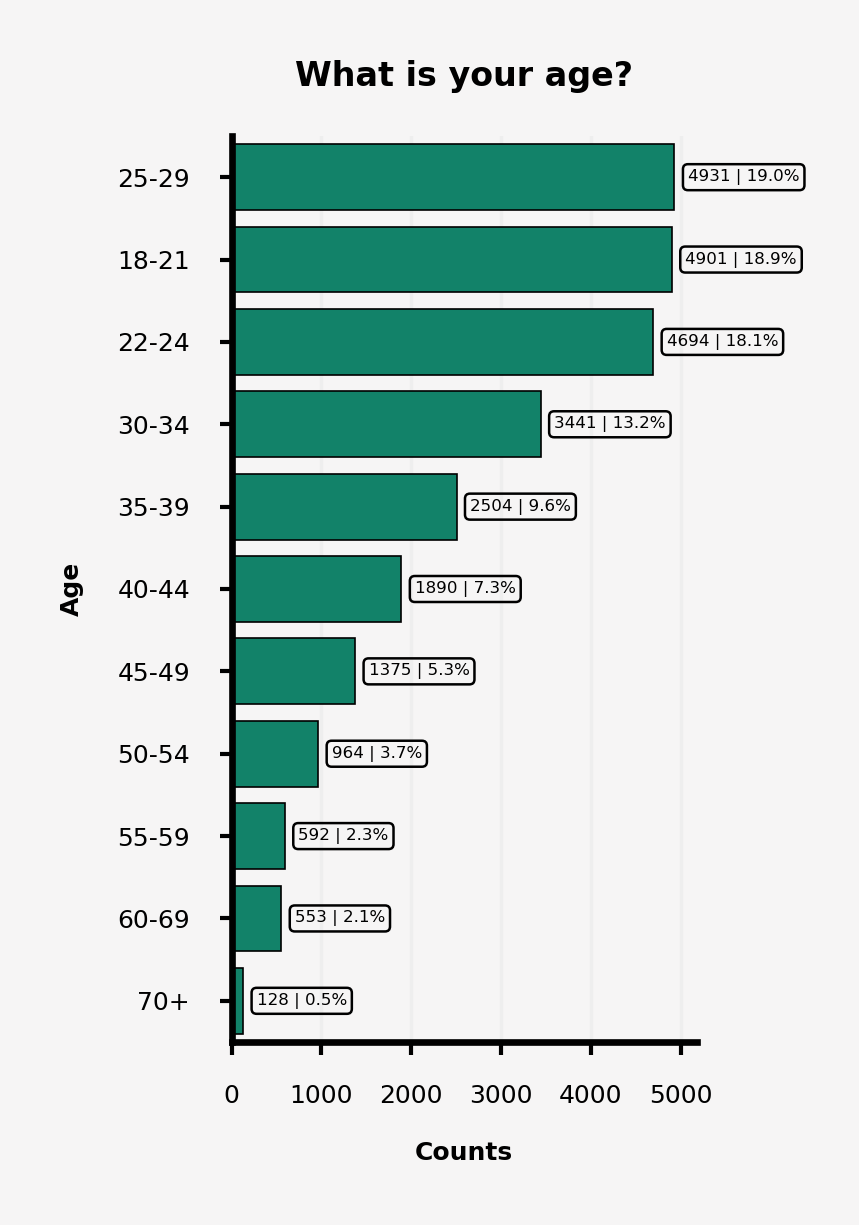

8404

In [30]:
#q3
_q = 'What is your age?'
gender = df.iloc[1:,1]

_x = gender.value_counts().values
_y = gender.value_counts().index

q1 = sns.barplot(y =_y,x=_x ,ax=setup_plot(w=1,h=2,X_label='Counts',y_label='Age'),zorder=2,linewidth=0.2,color='#009473',ec='black')
plt.title(_q,fontsize=4, weight='bold')

xmin, xmax = q1.get_xlim()
ymin, ymax = q1.get_ylim()


plt.text(xmax+1000,ymax,'Age Plot',fontsize=3,ha='right',alpha=.001) #ignore this line
for p in q1.patches:
            value = f'{p.get_width():.0f} | {(p.get_width()/gender.shape[0]):,.1%}'
            if value == '0':
                pass
            else:
                x = p.get_x() + p.get_width() + 150
                y = p.get_y() + p.get_height() / 2 
                q1.text(x, y, value, ha='left', va='center', fontsize=2, 
                        bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))
plt.show()

del gender, _x, _y
gc.collect()

In [32]:
_df_ = df[df.Q3 == 'Nigeria'] #my country


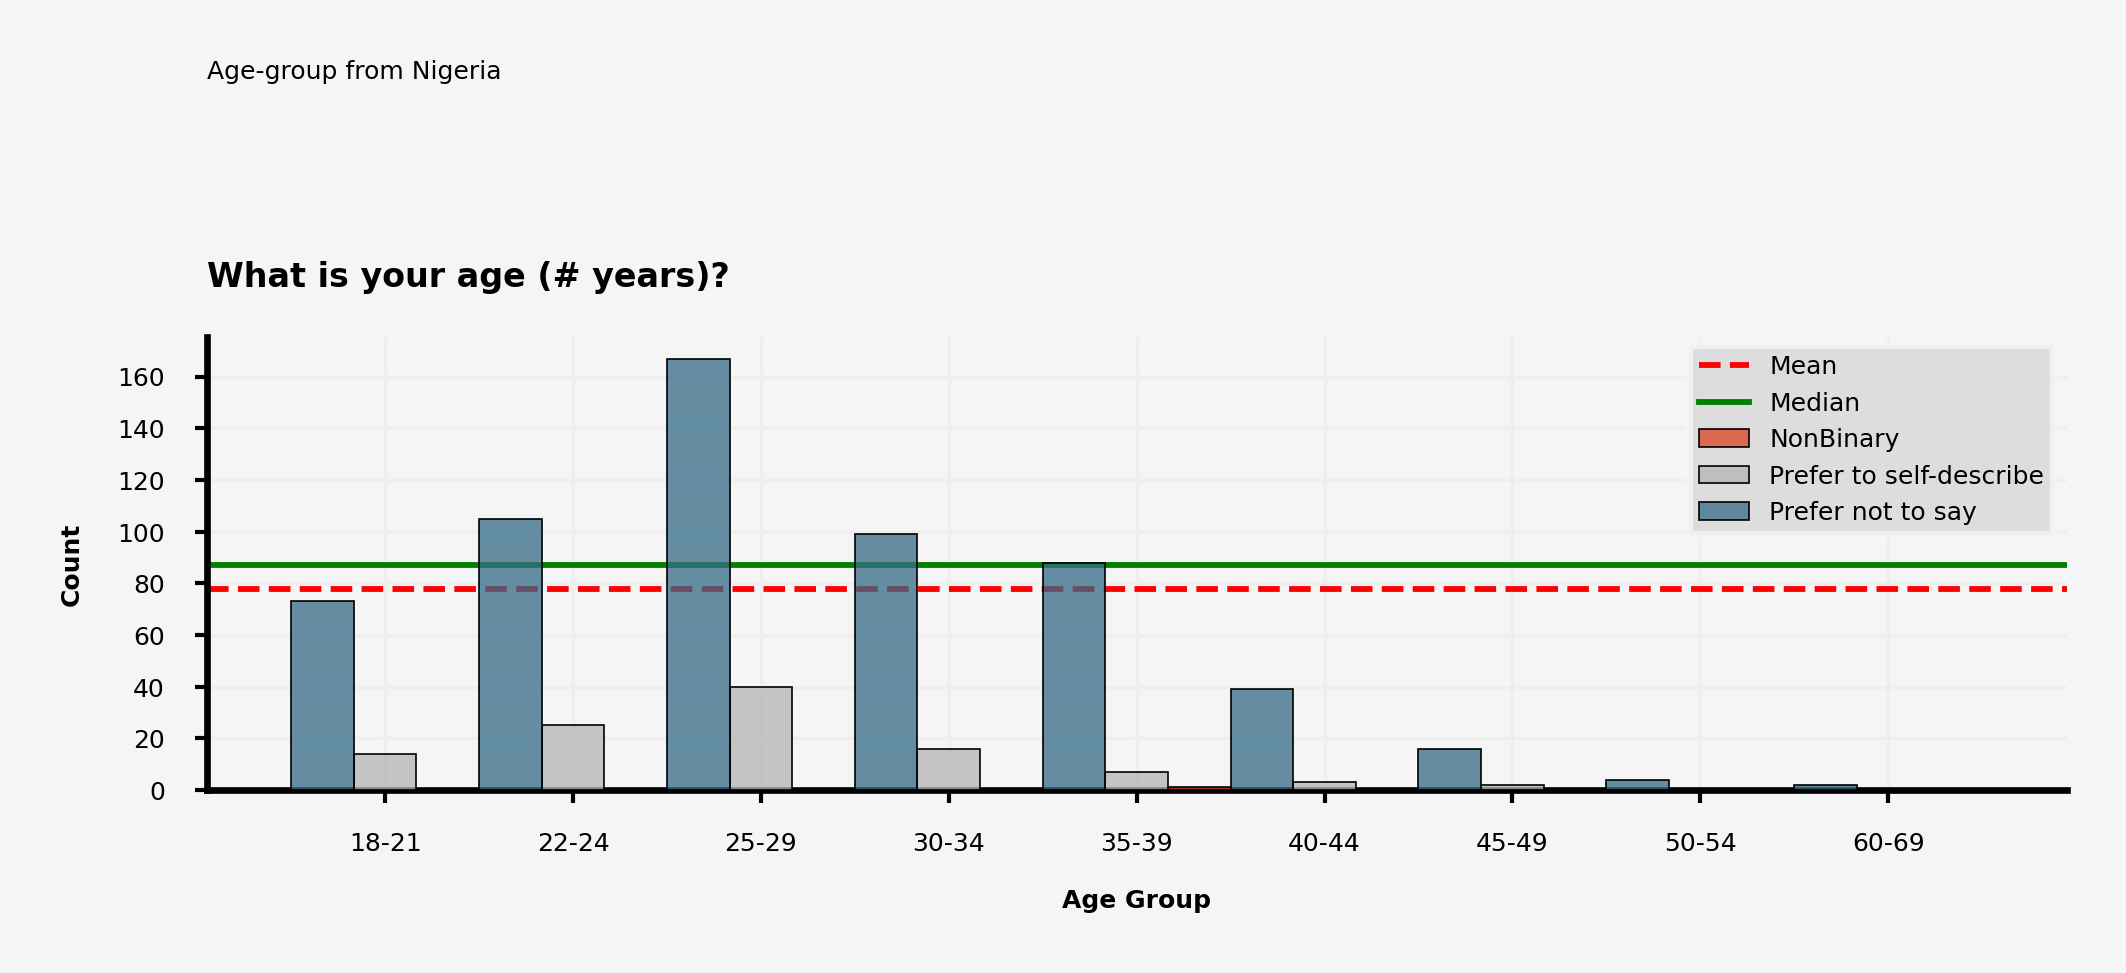

94

In [33]:
#q1
_q = 'What is your age?'
_df = _df_.iloc[1:,1]
country = _df_.iloc[1:,3]
gender = _df_.iloc[1:,2]
_df = pd.concat([_df,gender,country],axis=1)

#sort the values according the age-group
_df['sort'] = _df['Q1'].str.extract('(^[0-9]{2})', expand=False).astype(int)
_df.sort_values('sort',inplace=True, ascending=True)
_df = _df.drop('sort', axis=1)

#only seeing dataframe where counry is india
_df = _df[_df.Q3 == 'Nigeria']

q1 = sns.histplot(x = _df.Q1,ax=setup_plot(w=4,h=1,X_label='Age Group',y_label='Count'),zorder=4,linewidth=0.2,hue=_df.Q2,multiple='dodge')
plt.title('What is your age (# years)?',fontsize=4, weight='bold',ha='left',loc='left')

#plot mean and median
mean=_df['Q1'].value_counts().values.mean()
median=np.median(_df['Q1'].value_counts().values)
q1.axhline(mean, color='r', linestyle='--',linewidth=0.7)
q1.axhline(median, color='g', linestyle='-',linewidth=0.7)

xmin, xmax = q1.get_xlim()
ymin, ymax = q1.get_ylim()

plt.text(xmin,ymax+100,'Age-group from Nigeria',fontsize=3,ha='left')

q1.legend(['Mean','Median','NonBinary','Prefer to self-describe','Prefer not to say','Women','Man'], facecolor='#D8D8D8', edgecolor='#f6f5f5', fontsize=3, bbox_to_anchor=(1, 1.01), loc='upper right')

plt.show()

del gender, _df
gc.collect()

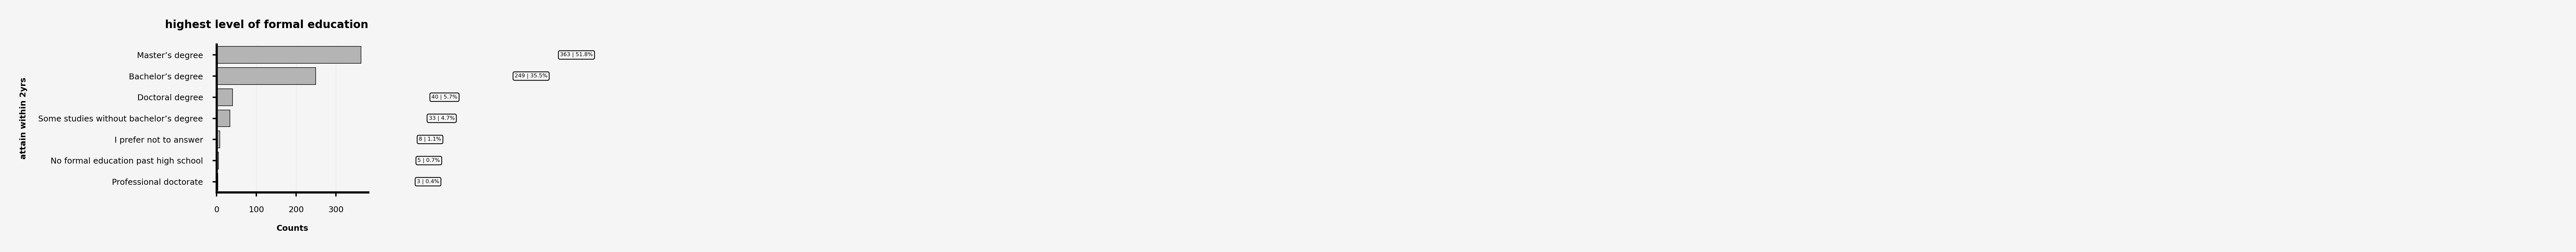

In [35]:
#q3
_q = str(Nigeria.iloc[0,4])
plot = Nigeria.iloc[1:,4]

_x = plot.value_counts().values
_y = ['Master’s degree', 'Bachelor’s degree', 'Doctoral degree',
       'Some studies without bachelor’s degree',
       'I prefer not to answer', 'No formal education past high school',
       'Professional doctorate']

q1 = sns.barplot(y =_y,x=_x ,ax=setup_plot(w=1,h=1,X_label='Counts',y_label='attain within 2yrs'),zorder=2,linewidth=0.2,color='#b4b4b4',alpha=1,ec='black')
plt.title('highest level of formal education',fontsize=4, weight='bold',ha='right',loc='right')

xmin, xmax = q1.get_xlim()
ymin, ymax = q1.get_ylim()

plt.text(xmax+5500,ymax,'Qualification Plot',fontsize=3,ha='right',alpha=.001) #ignore this line
for p in q1.patches:
            value = f'{p.get_width():.0f} | {(p.get_width()/country.shape[0]):,.1%}'
            if value == '0':
                pass
            else:
                x = p.get_x() + p.get_width() + 500
                y = p.get_y() + p.get_height() / 2 
                q1.text(x, y, value, ha='left', va='center', fontsize=2, 
                        bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))
plt.show()

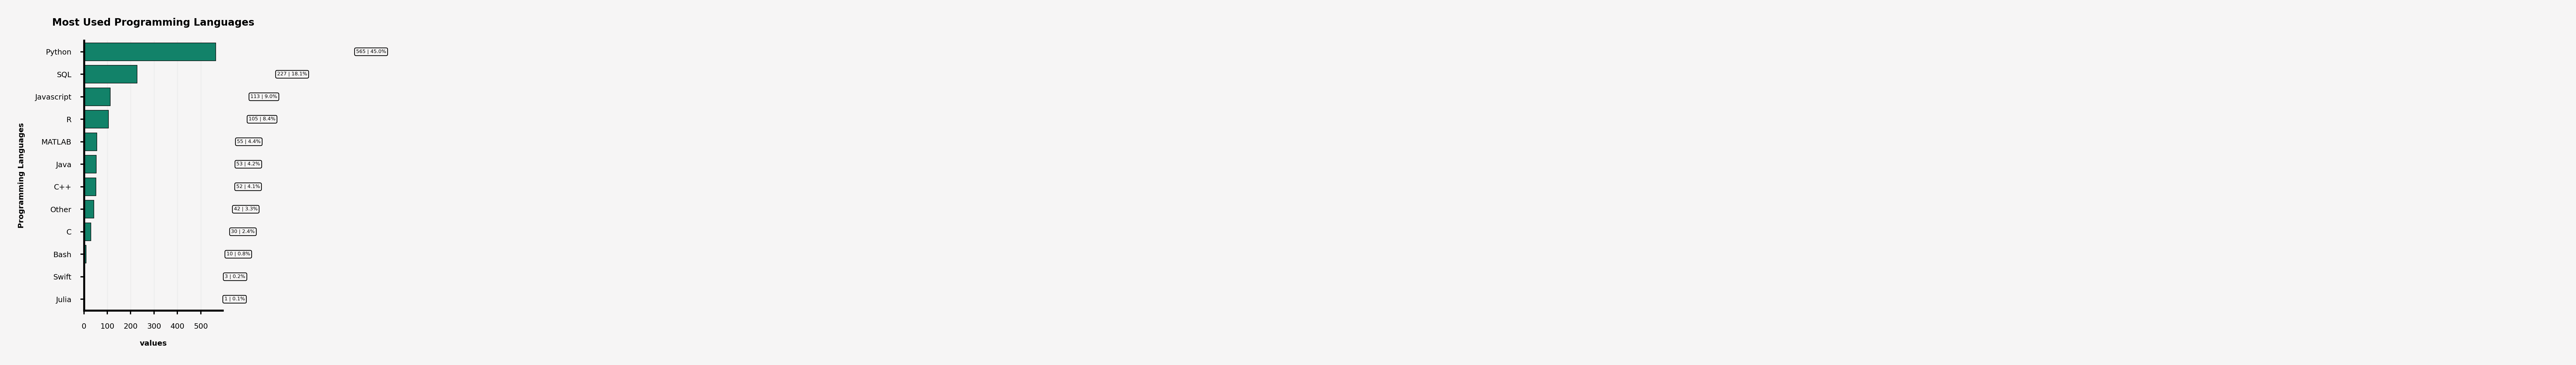

In [37]:
def clean(data,Question,n):
    x = []
    for i in range(1,n):
        x.append(Question+str(i))
    x.append(str('Q7_OTHER'))


    ddict = {}
    for i in x:
        ddict[data[i].value_counts().keys()[0]]=data[i].value_counts()[0]
    re = pd.DataFrame(ddict.items())
    re.iloc[:,-1] = re.iloc[:,-1].astype('int32')
    re.columns = ['Programming Languages','values']
    return re

plot = clean(Nigeria,'Q7_Part_',12)
_all = plot['values'].sum()
plot = plot.sort_values(['values'],ascending=False)

q1 = sns.barplot(y =plot['Programming Languages'],x=plot['values'],ax=setup_plot(w=1,h=2,X_label='Counts',y_label='Programming Languages'),zorder=2,linewidth=0.2,color='#009473',ec='black')
                   
plt.title('Most Used Programming Languages',fontsize=4, weight='bold')

xmin, xmax = q1.get_xlim()
ymin, ymax = q1.get_ylim()

plt.text(xmax+10000,ymax,'programming languages Plot',fontsize=3,ha='right',alpha=.001) #ignore this line
for p in q1.patches:
            value = f'{p.get_width():.0f} | {(p.get_width()/_all):,.1%}'
            if value == '0':
                pass
            else:
                x = p.get_x() + p.get_width() + 600
                y = p.get_y() + p.get_height() / 2 
                q1.text(x, y, value, ha='left', va='center', fontsize=2, 
                        bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))
plt.show()

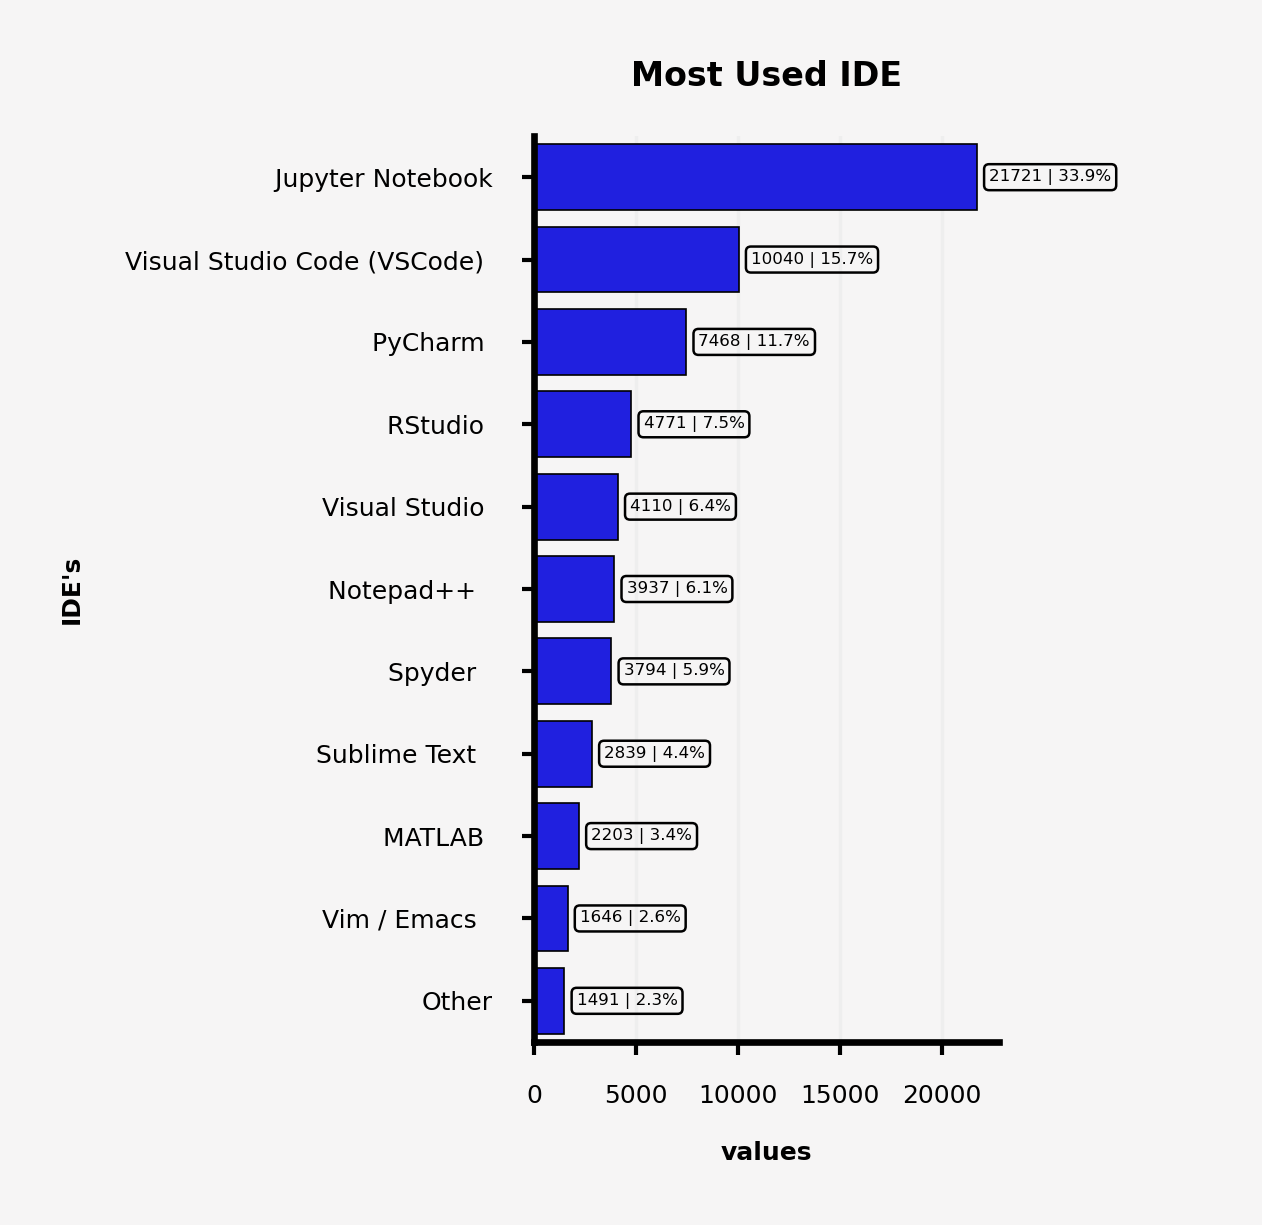

In [41]:
def clean(data,Question,n):
    x = []
    for i in range(1,n):
        x.append(Question+str(i))
    x.append(str('Q9_OTHER'))


    ddict = {}
    for i in x:
        ddict[data[i].value_counts().keys()[0]]=data[i].value_counts()[0]
    re = pd.DataFrame(ddict.items())
    re.iloc[:,-1] = re.iloc[:,-1].astype('int32')
    re.columns = ['IDE\'s','values']
    return re

plot = clean(df,'Q9_Part_',12)
_all = plot['values'].sum()
plot = plot.sort_values(['values'],ascending=False).reset_index(drop=True)

plot.iloc[0,-1] = int(plot.iloc[0,-1]) + 5488
plot.drop(3,inplace=True)

q1 = sns.barplot(y =plot['IDE\'s'],x=plot['values'],ax=setup_plot(w=1,h=2,X_label='Counts',y_label='IDE\'s'),zorder=2,linewidth=0.2,color=PAL[-3],ec='black')
                   
plt.title('Most Used IDE',fontsize=4, weight='bold')

xmin, xmax = q1.get_xlim()
ymin, ymax = q1.get_ylim()

plt.text(xmax+10000,ymax,'programming languages Plot',fontsize=3,ha='right',alpha=.001) #ignore this line
for p in q1.patches:
            value = f'{p.get_width():.0f} | {(p.get_width()/_all):,.1%}'
            if value == '0':
                pass
            else:
                x = p.get_x() + p.get_width() + 600
                y = p.get_y() + p.get_height() / 2 
                q1.text(x, y, value, ha='left', va='center', fontsize=2, 
                        bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))
plt.show()


,Python,R,SQL,C,C++,Java,Javascript,Julia,Swift,Bash,MATLAB,None,Others
Job Title,,,,,,,,,,,,,
Business Analyst,68%,22%,48%,7%,9%,9%,10%,1%,1%,3%,5%,3%,9%
Currently not employed,87%,19%,37%,13%,15%,12%,13%,1%,1%,6%,9%,3%,8%
DBA/Database Engineer,74%,13%,81%,16%,15%,22%,20%,2%,3%,25%,7%,1%,16%
Data Analyst,78%,31%,61%,7%,9%,9%,10%,1%,1%,4%,8%,1%,9%
Data Engineer,88%,18%,70%,12%,15%,21%,19%,1%,1%,19%,7%,0%,13%
Data Scientist,93%,32%,55%,10%,13%,12%,11%,2%,1%,12%,9%,0%,8%
Developer Relations/Advocacy,68%,11%,39%,13%,21%,27%,42%,3%,6%,10%,7%,0%,25%
Machine Learning Engineer,93%,10%,33%,18%,28%,19%,14%,1%,1%,13%,14%,0%,7%
Other,71%,17%,30%,13%,12%,11%,13%,1%,1%,7%,9%,4%,14%


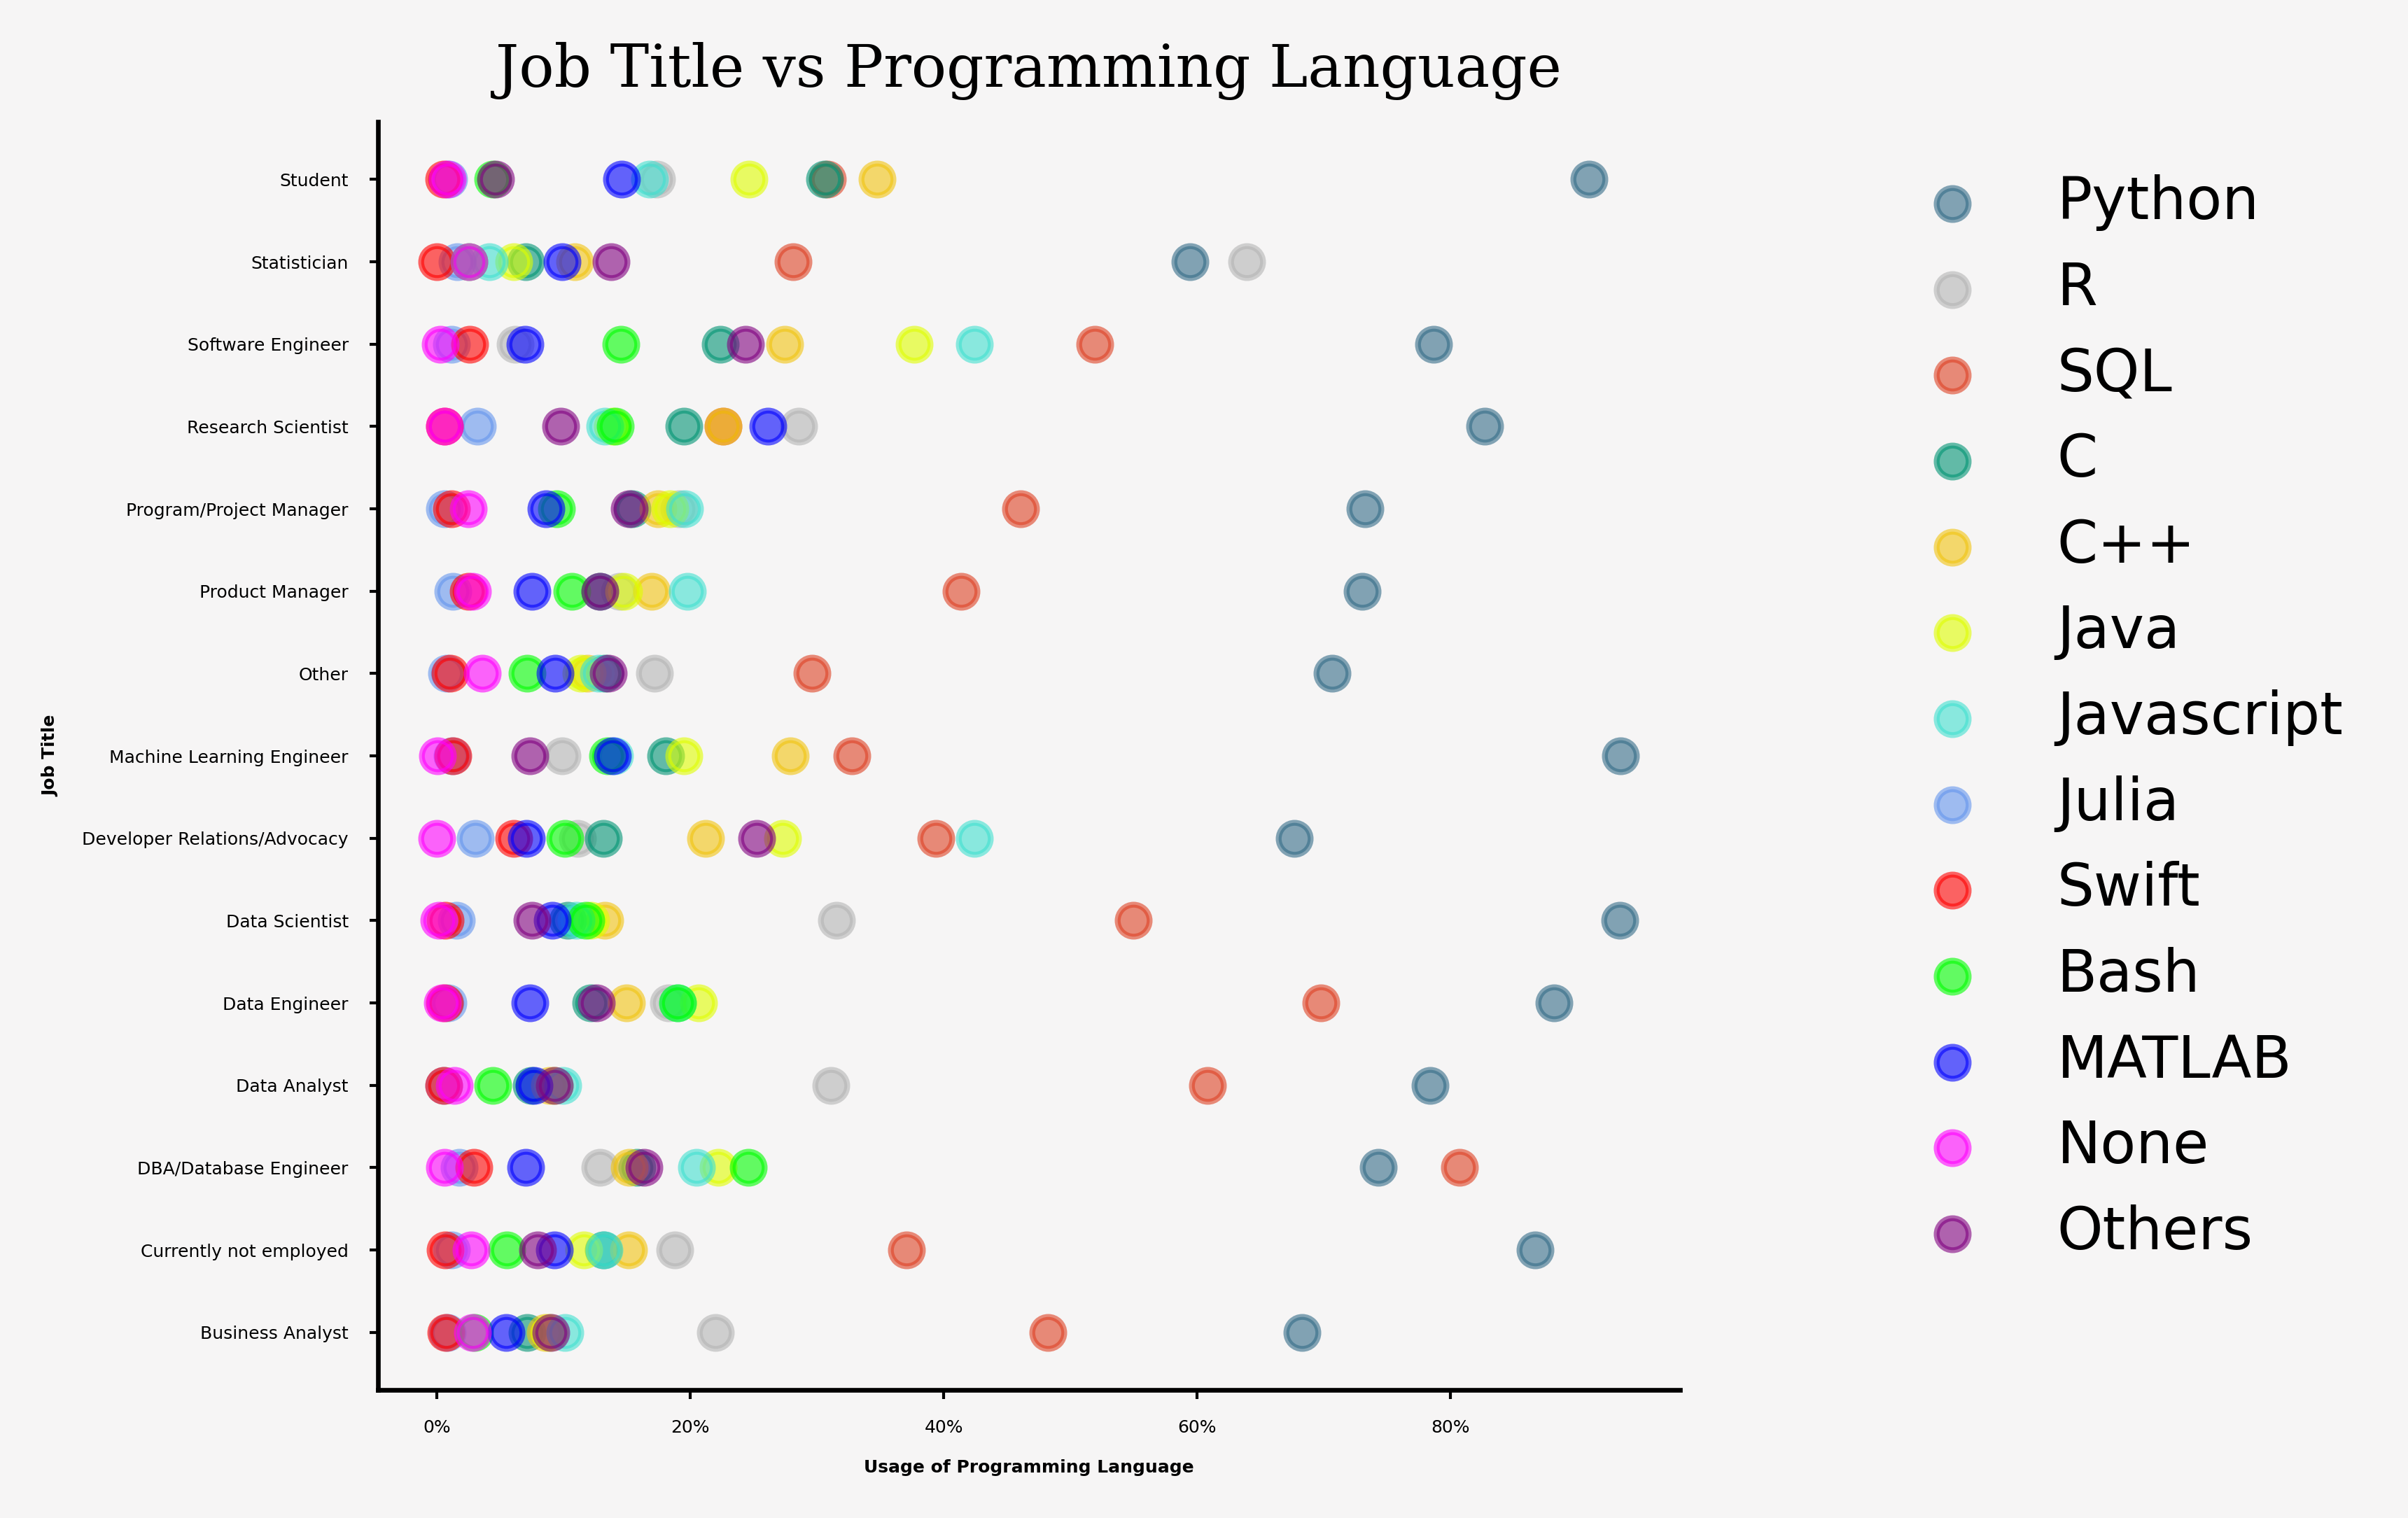

In [44]:
plot = map_col(Nigeria,'Q7_Part_',13)
plot['Q7_OTHER'] = 'Others'

visualize_relation(7,20, plot, 'Q5', 'Job Title', "Usage of Programming Language", "Job Title vs Programming Language", 150, 275,4,4)

In [47]:
Nigeria = df[df["Q3"]=="Nigeria"]

In [50]:
df['japan'] = df['Q3'] == 'Nigeria'

In [52]:
[col.split('?')[-1].strip() for col in df.columns if "IDE's" in col]

[]

In [53]:
ide_cols = [col.split('?')[-1].strip() for col in df.columns if "IDE's" in col]

In [56]:
ide_cols

[]